# Figure showing source heatmap

Make a figure showing the heat map of a source for a trained SOM

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['text.usetex'] = True

import numpy as np
from catalog import Pink
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

/Users/gal16b/Documents/Postdoc_Work/PINK/Notebook/catalog.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/gal16b/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/gal16b/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/gal16b/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/gal16b/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/gal16b/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
  

In [2]:
pink = Pink.loader('Script_Experiments_Fractions_Trials/FIRST_Norm_NoLog_3_12x12_Trial0/trained.pink')

In [3]:
binary = pink._reterive_binary('train')
SOM_path = binary.SOM_path

In [4]:
index = 5400
src_img = binary.get_image(index=index, channel=0)
src_map = binary.src_heatmap[SOM_path][index]

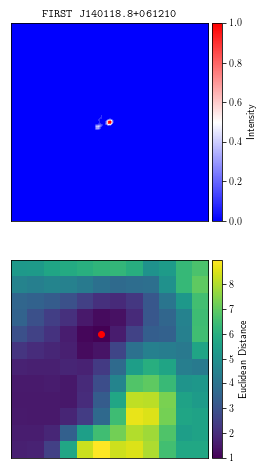

In [5]:
color_map='bwr'
title = binary.sources[index].rgz_path.split('/')[-1].replace('FIRST','').split('_')[0]


fig, ax = plt.subplots(2,1, figsize=(5,8))

im = ax[0].imshow(src_img, cmap=plt.get_cmap(color_map))
ax[0].set(title=f'$\\texttt{{{binary.channels[0]} {title}}}$')
ax[0].get_xaxis().set_ticks([])
ax[0].get_yaxis().set_ticks([])

divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax0, label='Intensity')

im = ax[1].imshow(src_map)
ax[1].get_xaxis().set_ticks([])
ax[1].get_yaxis().set_ticks([])

divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, label='Euclidean Distance')

pos = np.where(src_map==src_map.min())

ax[1].plot(*pos[::-1], 'ro')

fig.savefig('Images/Source_Heatmap.pdf')

In [6]:
binary.sources[index].rgz_path.split('/')[-1].replace('FIRST','').split('_')[0]

'J140118.8+061210'

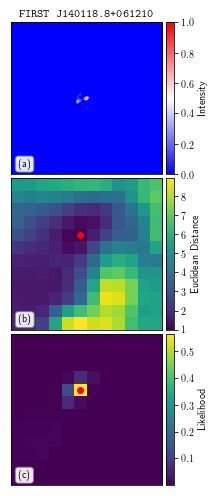

In [7]:
color_map='bwr'
title = binary.sources[index].rgz_path.split('/')[-1].replace('FIRST','').split('_')[0]

fig, ax = plt.subplots(3,1, figsize=(3.25,7))

im = ax[0].imshow(src_img, cmap=plt.get_cmap(color_map))
ax[0].set(title=f'$\\texttt{{{binary.channels[0]} {title}}}$')
ax[0].get_xaxis().set_ticks([])
ax[0].get_yaxis().set_ticks([])

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax[0].annotate('(a)', xy=(0.05,0.05), xycoords='axes fraction', bbox=bbox_props)

divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax0, label='Intensity')

im = ax[1].imshow(src_map)
ax[1].get_xaxis().set_ticks([])
ax[1].get_yaxis().set_ticks([])

divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, label='Euclidean Distance')

pos = np.where(src_map==src_map.min())
ax[1].plot(*pos[::-1], 'ro')
ax[1].annotate('(b)', xy=(0.05,0.05), xycoords='axes fraction', bbox=bbox_props)


l = 1/src_map**10.
l = l / l.sum()

im = ax[2].imshow(l)
ax[2].get_xaxis().set_ticks([])
ax[2].get_yaxis().set_ticks([])

divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax2, label='Likelihood')

pos = np.where(src_map==src_map.min())
ax[2].plot(*pos[::-1], 'ro')
ax[2].annotate('(c)', xy=(0.05,0.05), xycoords='axes fraction', bbox=bbox_props)


fig.tight_layout()
fig.subplots_adjust(hspace=0.025, left=0.025)

fig.savefig('Images/Source_Heatmap_Likelihood.pdf')